In [10]:
import numpy  as np
import matplotlib.pyplot as plt

In [83]:
def bracket_livro(x, y, l_r=None, x1=None, x2=None):

    # Iniciar coordenadas caso não sejão específicadas 
    if x1==None:
        x1 = x[0]
    if x2==None:
        x2 = x[-1]

    # Iniciar o parâmetro condizente ao tamanho do passo
    if l_r == None:
        l_r = 0.0001

    if y(x1) > y(x2):
        x1 = x2

    # Variável auxiliar 
    xx2 = x2
    while True:
        # Executando os passos
        xx2 = xx2 - (abs(xx2*l_r) + 0.00001)

        ''' Se o passo atual resulta em uma função 
        maior que a anterior a otimização é encerrada'''
        if y(x2) <= y(xx2):
          

            # Case para retornar a sequencia menor para maior
            if x1 > x2:
         
                return x2, x1

            return x1, x2
        
        x2 = xx2

In [87]:
'''Modificação do algoritmo bracket apresentado no livro, nesse
tentamos melhor o intervalo em ambos os lados, coisa que não ocorre
no do livro'''
def bracket_mod1(x, y):

    xx1, xx2 = bracket_livro(x, y)
    return bracket_livro(x, y, x1=xx1, x2=xx2)

In [88]:
def x_squared(x):
    return x**2

def x_squared1(x):
    return (x+6)**2

x = np.linspace(-15, 5, 10000)

In [89]:
bracket = bracket_livro(x, x_squared1)
bracket_mod = bracket_mod1(x, x_squared1)
print("Bracket: ", bracket)
print("Bracket_mod: ", bracket_mod)

Bracket:  (-15.0, -5.9999485154583265)
Bracket_mod:  (-5.9999485154583265, -5.9999485154583265)


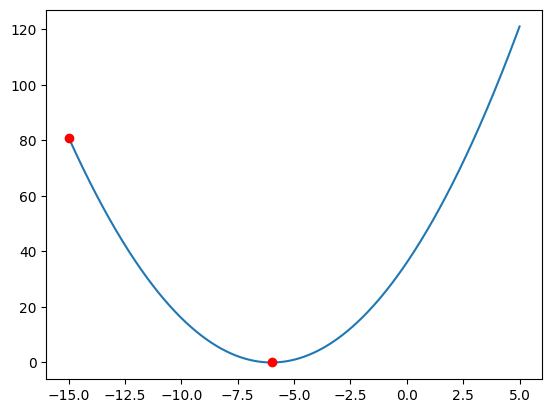

In [92]:
sub = plt.subplot(111)
sub.plot(x, x_squared1(x))
sub.plot(bracket[0], x_squared1(bracket[0]), "or")
sub.plot(bracket[1], x_squared1(bracket[1]), "or")